In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn import mixture
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline
#data=pd.read_fwf('page-blocks.txt',header=None)
data = pd.read_csv("dia.csv", sep=",", header=None, index_col=False)
#data.describe(include='all')

X=data.iloc[:,0:19].values

Y=data.iloc[:,19].values

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=0)
# rescale all the data

scalerMinMax = MinMaxScaler()
scalerStandard=StandardScaler()
scalerMinMax.fit(X_train)
scalerStandard.fit(X_train)
X_train_scaledMinMax=scalerMinMax.transform(X_train)
X_train_scaledStandard=scalerStandard.transform(X_train)
X_test_scaledMinMax=scalerMinMax.transform(X_test)
X_test_scaledStandard=scalerStandard.transform(X_test)
display(X.shape)
scalerStandard.fit(X)
X_scaled=scalerStandard.transform(X)
display(X_scaled.shape)
OrigX=X
X=X_scaled
print(X)
type(X)

(1151, 19)

(1151, 19)

[[ 0.05905386  0.2982129  -0.6414863  ... -1.29476283 -0.46865568
   1.40504812]
 [ 0.05905386  0.2982129  -0.56339113 ... -0.08216786  2.00605415
  -0.7117194 ]
 [ 0.05905386  0.2982129   0.92041699 ...  0.27428264  1.1215164
  -0.7117194 ]
 ...
 [ 0.05905386 -3.35330894  0.41279842 ...  1.33436273  1.19371332
  -0.7117194 ]
 [ 0.05905386  0.2982129   0.0223226  ... -1.32796165 -0.09707846
   1.40504812]
 [ 0.05905386  0.2982129  -1.22720003 ...  1.17603538 -1.08570243
  -0.7117194 ]]


numpy.ndarray

In [2]:
range_n_clusters = [2, 3, 4, 5, 6]


[-21868.999999999996,
 -16461.3669517307,
 -13354.911985261366,
 -11680.254279302646,
 -10552.902832420958,
 -9619.38798903367,
 -8759.57006878623,
 -8014.210141682959,
 -7520.615910120811,
 -7147.304179256311,
 -6912.625258979131,
 -6482.133012490553,
 -6195.875612246302,
 -5983.796209418291,
 -5873.813803036719,
 -5586.171775275411,
 -5486.776847318929,
 -5225.244333004023,
 -5063.467994101091]

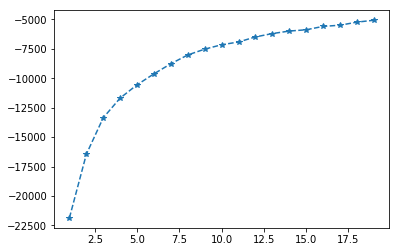

In [3]:
score=[]
for i in range(1,20):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X)
    score.append(kmeans.score(X, y=None))
display(score)
plt.plot(range(1,20),score,'--*')

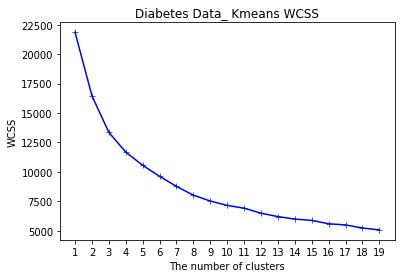

In [24]:
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i, random_state = 0,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,20), wcss,'+')
plt.plot(range(1,20), wcss,c='b')
plt.title("Diabetes Data_ Kmeans WCSS")
plt.xlabel("The number of clusters")
plt.xticks(range(1,20))
plt.ylabel("WCSS")
plt.show()

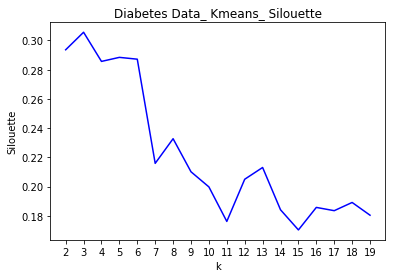

In [23]:
from sklearn.metrics import silhouette_score
s = []
for n_clusters in range(2,20):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0,init='k-means++')
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    s.append(silhouette_score(X, labels, metric='euclidean'))

plt.plot(range(2,20),s,c='b')
plt.ylabel("Silouette")
plt.xlabel("k")
plt.xticks(range(2,20))
plt.title("Diabetes Data_ Kmeans_ Silouette")
plt.show()

In [1]:
#

Automatically created module for IPython interactive environment


array([[0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.73853137, 0.        , 1.        ],
       ...,
       [0.        , 0.73853137, 0.        , 1.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 1.        ]])

array([[0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.73853137, 0.        , 1.        ],
       ...,
       [0.        , 0.73853137, 0.        , 1.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 1.        ]])

Homogeneity for 2 cluster: 0.017 
mutual index for 2 cluster: 0.015 
Homogeneity for 2 cluster: 0.016 


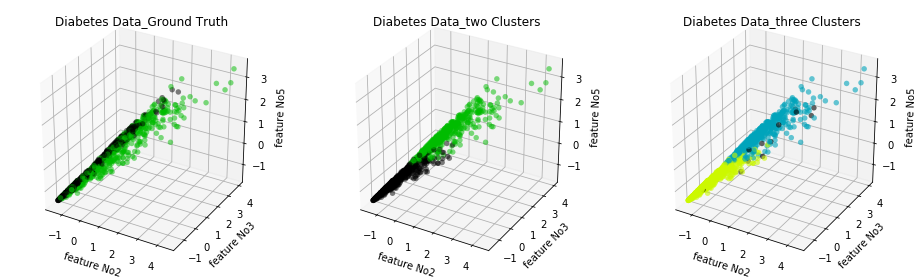

In [58]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=2,random_state=12,init='k-means++')
cluster_labels = clusterer.fit_predict(X)
centers = clusterer.cluster_centers_
fig = plt.figure(figsize=(16, 16))
ax1=fig.add_subplot(331,projection='3d')
ax2=fig.add_subplot(332,projection='3d')
ax3=fig.add_subplot(333,projection='3d')
ax1.scatter(X[:, 2], X[:, 3],X[:,5], s=30,lw=0, alpha=0.5,
                c=true_color, edgecolor='k') 
colors = cm.spectral(cluster_labels.astype(float) / 2)
display(colors)
ax2.scatter(X[:, 2], X[:, 3], X[:,5],s=30, lw=0, alpha=0.5,
                c=colors, edgecolor='k') 

ax1.set_xlabel('feature No2 ')
ax1.set_ylabel('feature No3')
ax1.set_zlabel('feature No5')
ax1.set_title('Diabetes Data_Ground Truth')
ax2.set_xlabel('feature No2  ')
ax2.set_ylabel('feature No3 ')
ax2.set_zlabel('feature No5')
ax2.set_title('Diabetes Data_two Clusters')
ax3.set_xlabel('feature No2  ')
ax3.set_ylabel('feature No3 ')
ax3.set_zlabel('feature No5')
ax3.set_title('Diabetes Data_three Clusters')
display(colors)

clusterer = KMeans(n_clusters=3,random_state=12,init='k-means++')
cluster_labels = clusterer.fit_predict(X)
colors = cm.spectral(cluster_labels.astype(float) / 3)
ax3.scatter(X[:, 2], X[:, 3], X[:,5],s=30, lw=0, alpha=0.6,
                c=colors, edgecolor='k') 


print("Homogeneity for 3 cluster: %0.3f " % metrics.homogeneity_score(Y, cluster_labels))
print("mutual index for 3 cluster: %0.3f " % metrics.adjusted_mutual_info_score(Y, cluster_labels))
print("completness 3 cluster: %0.3f " % metrics.completeness_score(Y, cluster_labels))
 


In [66]:
display(X)

array([[ 0.05905386,  0.2982129 , -0.6414863 , ..., -1.29476283,
        -0.46865568,  1.40504812],
       [ 0.05905386,  0.2982129 , -0.56339113, ..., -0.08216786,
         2.00605415, -0.7117194 ],
       [ 0.05905386,  0.2982129 ,  0.92041699, ...,  0.27428264,
         1.1215164 , -0.7117194 ],
       ...,
       [ 0.05905386, -3.35330894,  0.41279842, ...,  1.33436273,
         1.19371332, -0.7117194 ],
       [ 0.05905386,  0.2982129 ,  0.0223226 , ..., -1.32796165,
        -0.09707846,  1.40504812],
       [ 0.05905386,  0.2982129 , -1.22720003, ...,  1.17603538,
        -1.08570243, -0.7117194 ]])

(1151,)

(1151,)

(1151,)

(1151,)

(1151,)

(1151,)

(1151,)

(1151,)

(1151,)

(1151,)

(1151,)

(1151,)

(1151,)

(1151,)

(1151,)

(1151,)

(1151,)

(1151,)

(1151,)

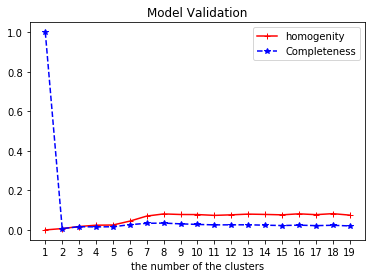

[7.227560436618035e-16,
 0.0067795509820533445,
 0.01723529014322396,
 0.023817465834871494,
 0.024852489959949663,
 0.044513511033729414,
 0.07007326020270718,
 0.08093481280382778,
 0.07800978825139167,
 0.0776586716478221,
 0.0735358973661007,
 0.07635199523242372,
 0.0799455955846103,
 0.07837025973282097,
 0.07628138706612177,
 0.08140504437061122,
 0.0771734555395291,
 0.0822908233325212,
 0.07484078120794535]

[1.0,
 0.006815362916623882,
 0.016063233569117572,
 0.015390526336514358,
 0.01591962981516184,
 0.026436495046238025,
 0.03349134955569665,
 0.03448109156345538,
 0.030720647784933445,
 0.027754850118531817,
 0.02553821043770043,
 0.025649911151893648,
 0.02593512981771698,
 0.023887709397076334,
 0.022163937075609305,
 0.02410951891486106,
 0.021666452042921964,
 0.02344419494908278,
 0.020167802170909938]

In [9]:
homogenity = []
complete=[]
for n_components in range(1,20):
        clusterer= KMeans(n_clusters=n_components,random_state=0,init='k-means++')
        clusterer.fit(X)
        labels = clusterer.labels_
        display(labels.shape)
        homogenity.append(metrics.homogeneity_score(Y,  labels))
        complete.append(metrics.completeness_score(Y,  labels))

plt.plot(range(1,20),homogenity,'-+',color="r")
plt.plot(range(1,20),complete,'--*',color="b")
plt.legend([ 'homogenity','Completeness',])
plt.xticks(range(1,20))
plt.xlabel("the number of the clusters")
plt.title("Model Validation")
plt.show()
display(homogenity)
display(complete)

In [8]:
#